In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dim = 2
n = 4
chi = 16
chi_mpo = 16

In [3]:
def left(pos, dim, n):
    if pos <= int(n/2):
        return (2**dim)**pos
    else:
        return (2**dim)**(n-pos)

In [4]:
def right(pos, dim, n):
    if pos < int(n/2):
        return (2**dim)**(pos+1)
    else:
        return (2**dim)**(n-pos-1)

In [5]:
def left_right(pos, dim, n, chi):
    l = left(pos, dim, n)
    if l > chi:
        l = chi
    r = right(pos, dim, n)
    if r > chi:
        r = chi
    
    return l, r

In [6]:
def mps(dim, n, chi):
    parameter_mps = 0
    for pos in range(n):
        l, r = left_right(pos, dim, n, chi)
        parameter_mps += 2**dim*l*r
    
    return parameter_mps

In [7]:
def mps_independent(dim, n, chi):
    parameter_mps = 0
    for pos in range(n):
        l, r = left_right(pos, dim, n, chi)
        parameter_mps += 2**dim*l*r
        if pos > 0 and pos < n-1:
            parameter_mps -= r**2
    
    return parameter_mps

In [70]:
def max_tensor(dim, chi):
    return 2**dim*chi**2

In [71]:
def hadamard_mpo(dim, n, chi, chi_mpo):
    if chi > chi_mpo:
        chi = chi_mpo
    parameter_mpo = 0
    for pos in range(n):
        l, r = left_right(pos, dim, n, chi)
        parameter_mpo += (2**dim)**2*l*r
    
    return parameter_mpo

In [72]:
def d(dim, n):
    params = 1*4*3*4 + 3*4*5*4 + 5*4*1*4 + (n-3)*3*4*3*4

    return params

In [73]:
def big_mpo(dim, n, chi_mpo):
    params = 1*4*chi_mpo*4*2 + (n-2)*chi_mpo**2*4*4

    return params

In [74]:
def mps_mps_lr(dim, n, chi):
    params = 0
    for pos in range(n):
        l, r = left_right(pos, dim, n, chi)
        params += l*l
    
    return params

In [75]:
def mps_mpo_mps_lr(dim, n, chi, chi_mpo):
    params = 1
    for pos in range(1, n):
        l, r = left_right(pos, dim, n, chi)
        params += l*l*chi_mpo
    
    return params

In [76]:
def total_params(dim, n, chi, chi_mpo):
    params = 0
    params += 6*mps(dim, n, chi)
    params += 4*max_tensor(dim, chi)
    params += 2*hadamard_mpo(dim, n, chi, chi_mpo)
    params += 7*big_mpo(dim, n, chi_mpo)
    params += 4*d(dim, n)
    params += 4*mps_mps_lr(dim, n, chi)
    params += 30*mps_mpo_mps_lr(dim, n, chi, chi_mpo)

    return params

In [77]:
total_params(dim, n, chi, chi_mpo)

214114

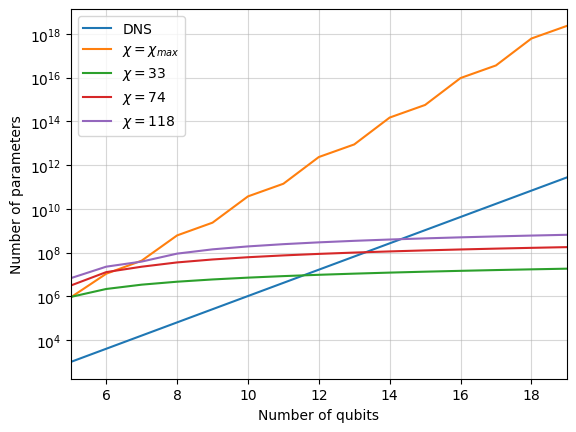

In [81]:
n_list = np.arange(5, 20)
params_DNS = []
params_n = []
params_chi_33 = []
params_chi_74 = []
params_chi_118 = []
for n in n_list:
    params_DNS.append(2**n*2**n)
    params_n.append(total_params(2, n, 2**n, 2**n))
    params_chi_33.append(total_params(2, n, 33, 33))
    params_chi_74.append(total_params(2, n, 74, 74))
    params_chi_118.append(total_params(2, n, 118, 118))
fig, ax = plt.subplots()
plt.plot(n_list, params_DNS, label='DNS')
plt.plot(n_list, params_n, label='$\chi = \chi_{max}$')
plt.plot(n_list, params_chi_33, label='$\chi = 33$')
plt.plot(n_list, params_chi_74, label='$\chi = 74$')
plt.plot(n_list, params_chi_118, label='$\chi = 118$')
ax.set_yscale('log')
ax.set_xlim([5, 19])
ax.grid(alpha=0.5)
plt.xlabel('Number of qubits')
plt.ylabel('Number of parameters')
plt.legend()
plt.show()

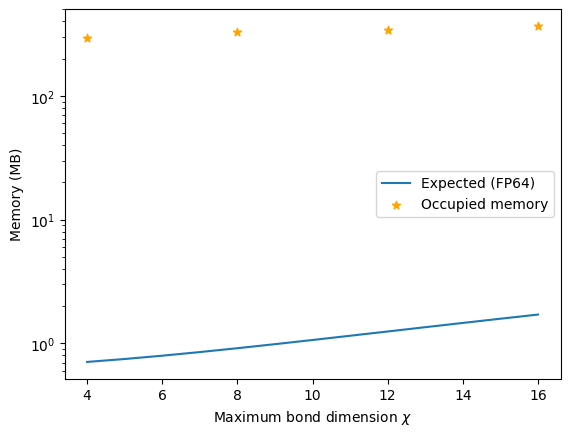

In [19]:
chi_list = np.arange(4, 17)
params = []
for chi in chi_list:
    params.append(total_params(2, 4, chi, 16))
chi_real = [4, 8, 12, 16]
memory_real_MiB = [1142, 1174, 1186, 1210]
memory_real_MB = (np.array(memory_real_MiB)-860)*2**20*1e-6
memory = np.array(params)*8*1e-6
fig, ax = plt.subplots()
plt.plot(chi_list, memory, label='Expected (FP64)')
ax.scatter(chi_real, memory_real_MB, label='Occupied memory', c='orange', marker='*')
plt.xlabel('Maximum bond dimension $\chi$')
plt.ylabel('Memory (MB)')
ax.set_yscale('log')
plt.legend()
plt.show()